# Modeling

In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to load
!pip install lightgbm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import numpy as np
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:05.094499


In [2]:
%%time
vars = pd.read_csv('vars_final_1.csv')
print(vars.shape)
vars.head()

(96397, 22)
Wall time: 231 ms


,card_merch_total_7,card_state_max_3,Merchnum_max_0,card_zip_max_3,Cardnum_total_7,merch_state_max_3,Merchnum_max_3,merch_state_max_0,Merchnum_max_1,card_zip_total_7,...,Cardnum_avg_1,Cardnum_avg_0,merch_state_max_1,merch_zip_max_0,merch_zip_max_3,Merch description_max_3,Merch description_max_0,Merch description_max_1,Recnum,Fraud
0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,1,0
1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,2,0
2,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,3,0
3,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,4,0
4,7.24,3.62,3.62,3.62,7.24,3.62,3.62,3.62,3.62,7.24,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,5,0


In [3]:
final_vars = pd.read_csv('final_vars_list.csv')
final_vars

,variable name
0,card_merch_total_7
1,card_state_max_3
2,Merchnum_max_0
3,card_zip_max_3
4,Cardnum_total_7
5,merch_state_max_3
6,Merchnum_max_3
7,merch_state_max_0
8,Merchnum_max_1
9,card_zip_total_7


In [4]:
# change # of vars
numvars = min(10,len(final_vars))
final_vars_list = ['Recnum','Fraud']
for i in range(numvars):
    final_vars_list.append(final_vars.iloc[i]['variable name'])
    
final_vars_list

['Recnum',
 'Fraud',
 'card_merch_total_7',
 'card_state_max_3',
 'Merchnum_max_0',
 'card_zip_max_3',
 'Cardnum_total_7',
 'merch_state_max_3',
 'Merchnum_max_3',
 'merch_state_max_0',
 'Merchnum_max_1',
 'card_zip_total_7']

In [5]:
vars = vars.filter(final_vars_list,axis=1)
vars.head()

,Recnum,Fraud,card_merch_total_7,card_state_max_3,Merchnum_max_0,card_zip_max_3,Cardnum_total_7,merch_state_max_3,Merchnum_max_3,merch_state_max_0,Merchnum_max_1,card_zip_total_7
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,5,0,7.24,3.62,3.62,3.62,7.24,3.62,3.62,3.62,3.62,7.24


In [6]:
vars.shape

(96397, 12)

In [7]:
# use this to cap variables. For some problems it helps
Clip = 10

In [8]:
# vars.rename(columns={'fraud_label':'Fraud'},inplace=True)

In [9]:
vars['Fraud'].sum()

1059

In [10]:
vars.head(10)

,Recnum,Fraud,card_merch_total_7,card_state_max_3,Merchnum_max_0,card_zip_max_3,Cardnum_total_7,merch_state_max_3,Merchnum_max_3,merch_state_max_0,Merchnum_max_1,card_zip_total_7
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,5,0,7.24,3.62,3.62,3.62,7.24,3.62,3.62,3.62,3.62,7.24
5,6,0,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67
6,7,0,3.62,3.62,3.67,3.62,3.62,3.67,3.67,3.67,3.67,3.62
7,8,0,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32
8,9,0,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11
9,10,0,10.86,3.62,3.67,3.62,10.86,3.67,3.67,3.67,3.67,10.86


In [11]:
vars.shape

(96397, 12)

In [12]:
vars.describe()

,Recnum,Fraud,card_merch_total_7,card_state_max_3,Merchnum_max_0,card_zip_max_3,Cardnum_total_7,merch_state_max_3,Merchnum_max_3,merch_state_max_0,Merchnum_max_1,card_zip_total_7
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,48365.481820,0.010986,690.574005,485.602332,513.147751,447.719977,2384.036098,670.298434,704.853247,502.122778,609.880320,713.775022
std,27945.003883,0.104236,4104.137998,1055.455595,1034.431876,1019.061865,7158.500841,1241.652611,1408.210129,998.844002,1283.554148,4112.586929
min,1.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.140000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,24154.000000,0.000000,65.600000,47.050000,56.600000,41.400000,292.400000,90.520000,91.020000,55.700000,70.840000,71.200000
50%,48365.000000,0.000000,202.980000,181.540000,196.000000,160.620000,986.140000,295.000000,300.000000,192.000000,245.850000,217.430000
75%,72578.000000,0.000000,600.000000,543.850000,590.000000,489.840000,2566.000000,855.130000,898.400000,575.000000,736.780000,628.240000
max,96753.000000,1.000000,306633.410000,47900.000000,47900.000000,47900.000000,312616.060000,47900.000000,47900.000000,47900.000000,47900.000000,306633.410000


In [13]:
record_save = vars['Recnum']
Y_save = pd.DataFrame(vars.loc[:,'Fraud'])
Y_save.head()

,Fraud
0,0
1,0
2,0
3,0
4,0


## Scale and truncate field values

In [14]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

,card_merch_total_7,card_state_max_3,Merchnum_max_0,card_zip_max_3,Cardnum_total_7,merch_state_max_3,Merchnum_max_3,merch_state_max_0,Merchnum_max_1,card_zip_total_7
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,690.574005,485.602332,513.147751,447.719977,2384.036098,670.298434,704.853247,502.122778,609.880320,713.775022
std,4104.137998,1055.455595,1034.431876,1019.061865,7158.500841,1241.652611,1408.210129,998.844002,1283.554148,4112.586929
min,0.010000,0.010000,0.010000,0.010000,0.140000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,65.600000,47.050000,56.600000,41.400000,292.400000,90.520000,91.020000,55.700000,70.840000,71.200000
50%,202.980000,181.540000,196.000000,160.620000,986.140000,295.000000,300.000000,192.000000,245.850000,217.430000
75%,600.000000,543.850000,590.000000,489.840000,2566.000000,855.130000,898.400000,575.000000,736.780000,628.240000
max,306633.410000,47900.000000,47900.000000,47900.000000,312616.060000,47900.000000,47900.000000,47900.000000,47900.000000,306633.410000


In [15]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [16]:
# push in any outlier values
cols = X.columns
X.loc[:,cols] = X[cols].clip(upper=Clip)
X.loc[:,cols] = X[cols].clip(lower=-1*Clip)
# X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

,card_merch_total_7,card_state_max_3,Merchnum_max_0,card_zip_max_3,Cardnum_total_7,merch_state_max_3,Merchnum_max_3,merch_state_max_0,Merchnum_max_1,card_zip_total_7
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,-0.012559,-0.011436,-0.010479,-0.011704,-0.014465,-0.010869,-0.012525,-0.010162,-0.012564,-0.012513
std,0.462480,0.773124,0.804586,0.758784,0.694553,0.803331,0.774909,0.814304,0.756849,0.466538
min,-0.168260,-0.460078,-0.496058,-0.439335,-0.333016,-0.539836,-0.500524,-0.502694,-0.475142,-0.173556
25%,-0.152279,-0.415510,-0.441351,-0.398720,-0.292189,-0.466941,-0.435896,-0.446939,-0.419959,-0.156246
50%,-0.118805,-0.288086,-0.306591,-0.281730,-0.195278,-0.302257,-0.287495,-0.310482,-0.283611,-0.120689
75%,-0.022069,0.055187,0.074294,0.041332,0.025419,0.148859,0.137442,0.072962,0.098866,-0.020798
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [17]:
# separate data into modeling (traintest) and out of time
oot_recnum=84300
X_trntst = X[0:oot_recnum]
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

In [18]:
niter = 0
nitermax = 10
FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

## Models. You can comment out any of these cells and just explore one model type. You can also just rerun that single cell multiple times as you explore different model hyperparameters.

In [19]:
%%time
# Logistic regression

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = LogisticRegression()
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

C:\Users\Vivia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0 0.6619273301737757 0.6477732793522267 0.30726256983240224


C:\Users\Vivia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1 0.6590538336052202 0.6254681647940075 0.3016759776536313


C:\Users\Vivia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2 0.6628849270664505 0.6273764258555133 0.3016759776536313


C:\Users\Vivia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3 0.6666666666666666 0.64 0.329608938547486


C:\Users\Vivia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4 0.6579804560260586 0.650375939849624 0.3016759776536313
5 0.6520325203252032 0.630188679245283 0.3463687150837989


C:\Users\Vivia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6 0.6587677725118484 0.6275303643724697 0.29608938547486036


C:\Users\Vivia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7 0.6623586429725363 0.6398467432950191 0.35195530726256985
8 0.6548956661316212 0.6575875486381323 0.36312849162011174
9 0.6547231270358306 0.6466165413533834 0.29608938547486036
trn    0.659129
tst    0.639276
oot    0.319553
dtype: float64
Wall time: 3.63 s


In [20]:
%%time
# Single DT

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = DecisionTreeClassifier()
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 1.0 0.5866141732283464 0.2849162011173184
1 1.0 0.6218487394957983 0.2569832402234637
2 1.0 0.6420664206642066 0.24022346368715083
3 1.0 0.5977859778597786 0.29608938547486036
4 1.0 0.5892857142857143 0.2849162011173184
5 1.0 0.6045627376425855 0.2681564245810056
6 1.0 0.6079734219269103 0.21787709497206703
7 1.0 0.6219512195121951 0.25139664804469275
8 1.0 0.5955056179775281 0.25139664804469275
9 1.0 0.6130268199233716 0.22905027932960895
trn    1.000000
tst    0.608062
oot    0.258101
dtype: float64
Wall time: 9.58 s


In [21]:
%%time
# RF

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = RandomForestClassifier(max_depth = 5,min_samples_leaf=50, min_samples_split= 60,\
                                    n_estimators=60, criterion='entropy')
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.7619834710743801 0.7454545454545455 0.4245810055865922
1 0.756578947368421 0.7022058823529411 0.4972067039106145
2 0.74481658692185 0.7509881422924901 0.441340782122905
3 0.7710651828298887 0.7609561752988048 0.4245810055865922
4 0.7623604465709729 0.7707509881422925 0.4022346368715084
5 0.768595041322314 0.7054545454545454 0.4245810055865922
6 0.7745571658615137 0.7451737451737451 0.4134078212290503
7 0.7601957585644372 0.7340823970037453 0.39664804469273746
8 0.7917355371900826 0.7272727272727273 0.41899441340782123
9 0.7743506493506493 0.7045454545454546 0.4301675977653631
trn    0.766624
tst    0.734688
oot    0.427374
dtype: float64
Wall time: 56.4 s


In [22]:
%%time
# BT

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = lgb.LGBMClassifier(n_estimators=400, max_depth=4,learning_rate=0.004, num_leaves=50, subsample=0.7)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.7935483870967742 0.7615384615384615 0.45251396648044695
1 0.7913907284768212 0.7463768115942029 0.44692737430167595
2 0.7931596091205212 0.7593984962406015 0.4860335195530726
3 0.8141447368421053 0.7426470588235294 0.441340782122905
4 0.8 0.7407407407407407 0.49162011173184356
5 0.7816091954022989 0.6974169741697417 0.45251396648044695
6 0.7996794871794872 0.7109375 0.4860335195530726
7 0.7721518987341772 0.7459677419354839 0.49162011173184356
8 0.8 0.7672727272727272 0.5027932960893855
9 0.7873376623376623 0.7575757575757576 0.4581005586592179
trn    0.793302
tst    0.742987
oot    0.470950
dtype: float64
Wall time: 16.9 s


In [ ]:
%%time
# NN

for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = MLPClassifier(hidden_layer_sizes=(10,10),learning_rate_init=0.02,solver='adam', activation='relu',alpha=0.002,\
                      learning_rate='constant')

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.7516233766233766 0.7272727272727273 0.5698324022346368
1 0.6836065573770492 0.6037037037037037 0.4692737430167598
2 0.6788553259141494 0.6613545816733067 0.5921787709497207
3 0.7072784810126582 0.7096774193548387 0.6201117318435754
4 0.7131147540983607 0.6851851851851852 0.5754189944134078
5 0.7100313479623824 0.6570247933884298 0.5586592178770949
6 0.6968253968253968 0.724 0.5754189944134078
7 0.6816 0.7058823529411765 0.5921787709497207
8 0.7082658022690438 0.688212927756654 0.5418994413407822
9 0.7013201320132013 0.6970802919708029 0.5642458100558659
trn    0.703252
tst    0.685939
oot    0.565922
dtype: float64
CPU times: user 59.7 s, sys: 933 ms, total: 1min
Wall time: 1min


In [ ]:
print('duration: ', datetime.now() - start_time)

duration:  0:10:21.504474


## The rest of the notebook makes the tables for your final model of choice. You need to run that final model only once (no CV). If you want you can run the below cell over and over by itself until it gives you a model you like. But you can't change from your best hyperparameters.

In [ ]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

# here's where you put your final model of choice
# model = lgb.LGBMClassifier()
model = MLPClassifier(hidden_layer_sizes=(10,10),learning_rate_init=0.02,solver='adam', activation='relu',alpha=0.002,\
                      )

X_oot = X_oot_orig.copy()
X_trn_save = X_trn.copy()
Y_trn_save = Y_trn.copy()

model.fit(X_trn, Y_trn.values.ravel())   

predictions = model.predict_proba(X_trn_save)[:,1]
X_trn['predicted'] = predictions
X_trn['Fraud'] = Y_trn_save['Fraud']
topRows = int(round(X_trn.shape[0]*0.03))
temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

predictions = model.predict_proba(X_tst)[:,1]
X_tst['predicted']=predictions
X_tst['Fraud'] = Y_tst['Fraud']
topRows = int(round(X_tst.shape[0]*0.03))
temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

predictions = model.predict_proba(X_oot)[:,1]
X_oot['predicted']=predictions
X_oot['Fraud'] = Y_oot['Fraud']
topRows = int(round(X_oot.shape[0]*0.03))
temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])

9 0.7189542483660131 0.7126865671641791 0.6089385474860335


In [ ]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [ ]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

,card_merch_total_7,card_state_max_3,Merchnum_max_0,card_zip_max_3,Cardnum_total_7,merch_state_max_3,Merchnum_max_3,merch_state_max_0,Merchnum_max_1,card_zip_total_7,predicted,Fraud
89129,7.252903,2.969597,1.533395,3.112824,3.921695,2.375529,2.070023,1.599066,2.345051,7.232361,0.946348,1
89128,7.161267,2.969597,1.533395,3.112824,3.869157,2.375529,2.070023,1.599066,2.345051,7.140913,0.942787,1
89121,7.047028,2.969597,1.533395,3.112824,3.803661,2.375529,2.070023,1.599066,2.345051,7.026909,0.938036,1
89186,9.940700,7.400622,7.524403,7.702094,5.462672,6.142082,5.391082,7.803528,5.988645,9.914637,0.921747,1
89183,9.893358,7.400622,7.524403,7.702094,5.435530,6.142082,5.391082,7.803528,5.988645,9.867391,0.919174,1
89120,6.647307,2.969597,1.533395,3.112824,3.574492,2.375529,2.070023,1.599066,2.345051,6.628009,0.918374,1
89117,6.560887,2.969597,1.533395,3.112824,3.524945,2.375529,2.070023,1.599066,2.345051,6.541767,0.913433,1
89114,6.460128,2.969597,1.533395,3.112824,3.467178,2.375529,2.070023,1.599066,2.345051,6.441215,0.907332,1
89082,5.398745,2.969597,-0.305934,3.112824,2.858662,2.375529,2.070023,-0.305796,2.345051,5.382013,0.894960,1
89174,9.480397,7.400622,7.524403,7.702094,5.198769,6.142082,5.391082,7.803528,5.988645,9.455279,0.893268,1


In [ ]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot
    
    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_trn

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,590.0,261.0,329.0,44.237288,55.762712,590.0,261.0,329.0,0.446933,53.758170,53.311237,0.793313
2,2.0,590.0,518.0,72.0,87.796610,12.203390,1180.0,779.0,401.0,1.333950,65.522876,64.188926,1.942643
3,3.0,590.0,551.0,39.0,93.389831,6.610169,1770.0,1330.0,440.0,2.277475,71.895425,69.617950,3.022727
4,4.0,590.0,573.0,17.0,97.118644,2.881356,2360.0,1903.0,457.0,3.258673,74.673203,71.414529,4.164114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,590.0,590.0,0.0,100.000000,0.000000,56650.0,56038.0,612.0,95.958766,100.000000,4.041234,91.565359
97,97.0,590.0,590.0,0.0,100.000000,0.000000,57240.0,56628.0,612.0,96.969074,100.000000,3.030926,92.529412
98,98.0,590.0,590.0,0.0,100.000000,0.000000,57830.0,57218.0,612.0,97.979383,100.000000,2.020617,93.493464
99,99.0,590.0,590.0,0.0,100.000000,0.000000,58420.0,57808.0,612.0,98.989691,100.000000,1.010309,94.457516


In [ ]:
FDR3.to_csv('FDR3.csv')

In [ ]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

In [ ]:
print("duration: ", datetime.now() - start_time)

duration:  0:03:34.114054


### Cutoff Plot

In [1]:
import pandas as pd

In [2]:
FDR_oot_graph = pd.read_csv('FDR_oot.csv')
FDR_oot_graph['Fraud Savings'] = FDR_oot_graph['cb'] * 2000
FDR_oot_graph['Good Loss'] = FDR_oot_graph['cg'] * 50
FDR_oot_graph['Overall Savings'] = FDR_oot_graph['Fraud Savings'] - FDR_oot_graph['Good Loss']

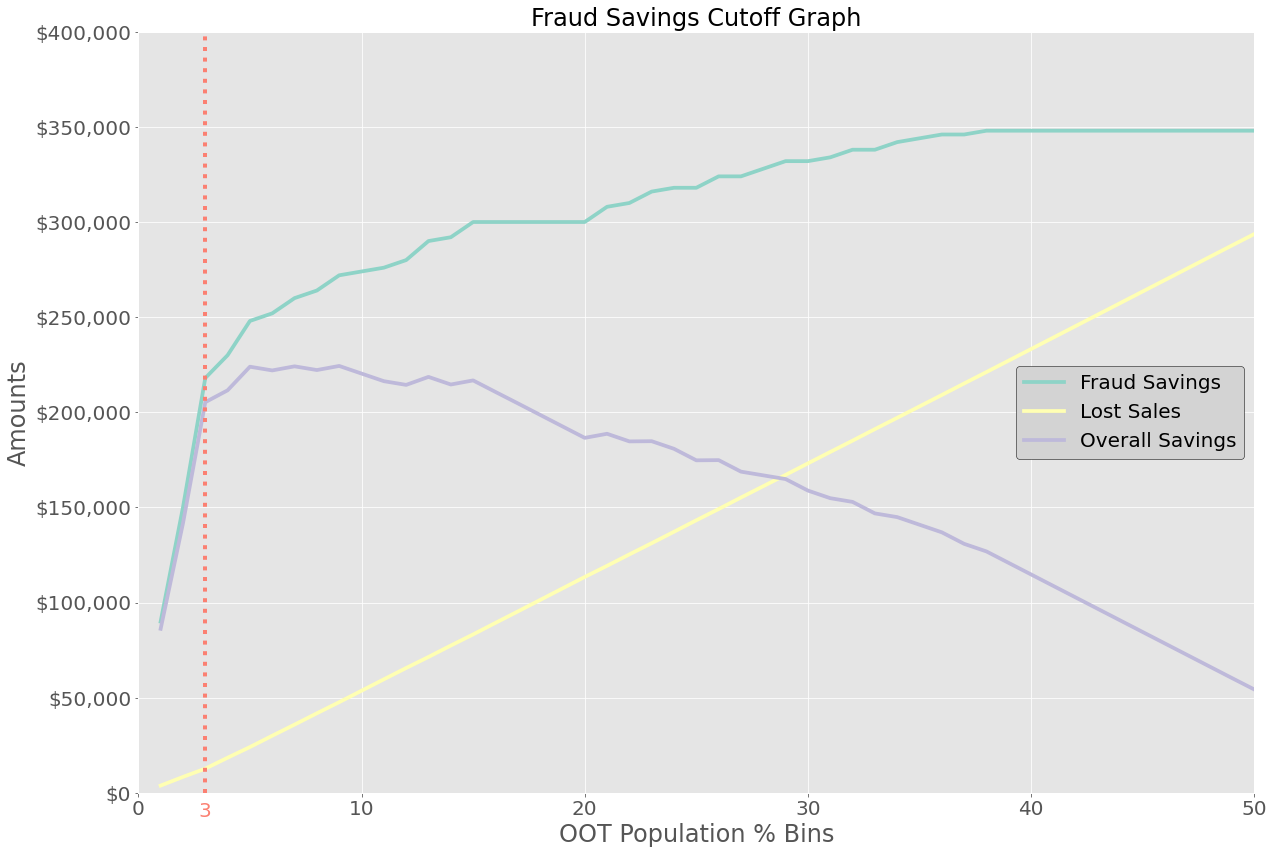

In [52]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 20})
plt.title('Fraud Savings Cutoff Graph',fontsize=24)
plt.ylim(0,400000)
plt.xlim(0,50)
plt.xlabel('OOT Population % Bins',fontsize=24)
plt.ylabel('Amounts',fontsize=24)
plt.rcParams["figure.figsize"] = (20,14)
plt.plot(FDR_oot_graph['bin'][1:101], FDR_oot_graph['Fraud Savings'][1:101], label = "Fraud Savings",
            color="#8ed3c7", linewidth=3.75)
plt.plot(FDR_oot_graph['bin'][1:101], FDR_oot_graph['Good Loss'][1:101], label = "Lost Sales",
            color="#ffffb3", linewidth=3.75)
plt.plot(FDR_oot_graph['bin'][1:101], FDR_oot_graph['Overall Savings'][1:101], label = "Overall Savings",
            color="#beb9da", linewidth=3.75)
plt.vlines(x=3, ymin=0,ymax=400000, color='#fb8072', linestyle='dotted', linewidth=4)
ax.yaxis.set_major_formatter('${x:,.0f}') #:,
ax.legend(loc='upper left', bbox_to_anchor=(0.78,0.55))
#ax.tick_params(axis='both', which='minor', labelsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.text(3, -.011, '3', color='#fb8072', transform=ax.get_xaxis_transform(),
            ha='center', va='top')
plt.rcParams["legend.loc"] = 'right'
plt.legend(facecolor='#d3d3d3', edgecolor="black", framealpha=1)
plt.show()

In [53]:
FDR_oot_graph

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR,Fraud Savings,Good Loss,Overall Savings
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1.0,121.0,76.0,45.0,62.809917,37.190083,121.0,76.0,45.0,0.637691,25.139665,24.501974,1.688889,90000.0,3800.0,86200.0
2,2.0,121.0,91.0,30.0,75.206612,24.793388,242.0,167.0,75.0,1.401242,41.899441,40.498200,2.226667,150000.0,8350.0,141650.0
3,3.0,121.0,87.0,34.0,71.900826,28.099174,363.0,254.0,109.0,2.131230,60.893855,58.762625,2.330275,218000.0,12700.0,205300.0
4,4.0,121.0,115.0,6.0,95.041322,4.958678,484.0,369.0,115.0,3.096157,64.245810,61.149653,3.208696,230000.0,18450.0,211550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,121.0,121.0,0.0,100.000000,0.000000,11613.0,11434.0,179.0,95.938916,100.000000,4.061084,63.877095,358000.0,571700.0,-213700.0
97,97.0,121.0,121.0,0.0,100.000000,0.000000,11734.0,11555.0,179.0,96.954187,100.000000,3.045813,64.553073,358000.0,577750.0,-219750.0
98,98.0,121.0,121.0,0.0,100.000000,0.000000,11855.0,11676.0,179.0,97.969458,100.000000,2.030542,65.229050,358000.0,583800.0,-225800.0
99,99.0,121.0,121.0,0.0,100.000000,0.000000,11976.0,11797.0,179.0,98.984729,100.000000,1.015271,65.905028,358000.0,589850.0,-231850.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d79a38e2-eaa7-463a-80c3-3da9091259bf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>